In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
raw_data = pd.read_csv("AMI_GSE66360_series_matrix.csv", encoding='ISO-8859-1')

C:\Users\itani\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3221: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [65]:
raw_data.shape

(54735, 100)

In [66]:
metadata = raw_data.iloc[:60, :]
data = raw_data.iloc[58:, :]
data = data.transpose()
data.columns = data.iloc[0]  # Assign first row to column names
data = data[1:]


In [67]:
data.head()

"!Series_title ""A Whole Blood Molecular Signature for the Identification of Acute Myocardial Infarction Without Relying Upon Myonecrosis (microarray)""",Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
Unnamed: 1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.2573,13.2662,14.5712,14.2766,4.50466,3.13933,2.74701,2.65155,3.41343,3.14061
Unnamed: 2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.5939,13.517,14.7388,14.3412,4.40923,3.03996,2.63861,2.64362,3.39906,3.13269
Unnamed: 3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.3728,13.4166,14.6272,14.3186,4.31008,3.22011,2.49526,2.62603,3.53997,3.6984
Unnamed: 4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.4902,13.4948,14.7541,14.3633,4.43931,3.26378,2.5442,2.50496,3.39623,3.63861
Unnamed: 5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.2368,13.3302,14.5484,14.2637,4.56288,3.13852,2.50663,2.60971,3.43472,3.57765


In [15]:
data.iloc[:,2:].head()

"!Series_title ""A Whole Blood Molecular Signature for the Identification of Acute Myocardial Infarction Without Relying Upon Myonecrosis (microarray)""",1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
Unnamed: 1,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,10.742427,7.270560667,...,13.2573,13.2662,14.5712,14.2766,4.50466,3.13933,2.74701,2.65155,3.41343,3.14061
Unnamed: 2,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,9.865655308,4.810194735,...,13.5939,13.517,14.7388,14.3412,4.40923,3.03996,2.63861,2.64362,3.39906,3.13269
Unnamed: 3,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,10.148454,7.822844272,...,13.3728,13.4166,14.6272,14.3186,4.31008,3.22011,2.49526,2.62603,3.53997,3.6984
Unnamed: 4,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,10.87991277,5.690417407,...,13.4902,13.4948,14.7541,14.3633,4.43931,3.26378,2.5442,2.50496,3.39623,3.63861
Unnamed: 5,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,10.09052505,7.089369391,...,13.2368,13.3302,14.5484,14.2637,4.56288,3.13852,2.50663,2.60971,3.43472,3.57765


A) 1) How many genes profiled?


In [16]:
genes_num = data.iloc[:,2:].shape[1]
print(f'the num of genes is {genes_num}')

the num of genes is 54675


2) How many samples (subjects/patients) in total?


In [17]:
samples_num = data.shape[0]
print(f'the num of samples is {samples_num}')

the num of samples is 99


3) How many samples in each class?


In [18]:
samp_H = data[data['Class'] == 'H'].shape[0]
samp_M = data[data["Class"] == 'M'].shape[0]
print(f'in Myocardial Infraction there are {samp_M}, while in Healthy group there are {samp_H}')

in Myocardial Infraction there are 49, while in Healthy group there are 50


4) If there are missing values, then remove the entire row
(gene) from the data matrix.
How many rows left now?


In [68]:
data.dropna(inplace=True, axis =1 )

5) Pick 20 genes at random. Draw histograms comparing
expression levels of each of these genes in the two
classes M and H.

In [52]:
data.iloc[:, 2:] = data.iloc[:, 2:].astype(float)

In [51]:
data

"!Series_title ""A Whole Blood Molecular Signature for the Identification of Acute Myocardial Infarction Without Relying Upon Myonecrosis (microarray)""",Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
Unnamed: 1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.2573,13.2662,14.5712,14.2766,4.50466,3.13933,2.74701,2.65155,3.41343,3.14061
Unnamed: 2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.5939,13.517,14.7388,14.3412,4.40923,3.03996,2.63861,2.64362,3.39906,3.13269
Unnamed: 3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.3728,13.4166,14.6272,14.3186,4.31008,3.22011,2.49526,2.62603,3.53997,3.6984
Unnamed: 4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.4902,13.4948,14.7541,14.3633,4.43931,3.26378,2.5442,2.50496,3.39623,3.63861
Unnamed: 5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.2368,13.3302,14.5484,14.2637,4.56288,3.13852,2.50663,2.60971,3.43472,3.57765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 95,M,GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,...,6.60175,5.94231,7.29051,8.98851,5.56795,5.55878,5.42944,4.48794,4.25429,5.37581
Unnamed: 96,M,GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,...,14.271,14.1637,14.8845,14.7925,4.9022,3.417,2.83474,2.78236,3.88208,3.74414
Unnamed: 97,M,GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,...,13.8986,13.6824,14.8845,14.7838,5.23991,3.69918,3.24968,3.05673,3.64983,4.02154
Unnamed: 98,M,GSM1620916,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,...,13.847,13.5516,14.8581,14.7782,4.55613,3.48528,2.71141,2.83382,3.52341,3.81256


In [53]:
import random
import matplotlib.pyplot as plt

np.random.seed(1)
random_integers = random.sample(range(2, data.shape[1]), 20)
df_m = data[data['Class'] == 'M']  # Samples with class 'M'
df_h = data[data['Class'] == 'H']  # Samples with class 'H'
data_for_hist_20_M = df_m.iloc[:,random_integers]
data_for_hist_20_H = df_h.iloc[:,random_integers]


In [47]:
data_for_hist_20_H = data_for_hist_20_H.astype(float).round(3)
data_for_hist_20_H

"!Series_title ""A Whole Blood Molecular Signature for the Identification of Acute Myocardial Infarction Without Relying Upon Myonecrosis (microarray)""",221645_s_at,220860_at,201261_x_at,1565771_at,212785_s_at,229191_at,207578_s_at,244828_x_at,238378_at,218507_at,214889_at,1562488_at,237478_at,1552957_at,236788_at,229638_at,208110_x_at,210300_at,209691_s_at,1558971_at
Unnamed: 1,9.754,2.397,5.290,4.195,9.104,5.521,4.789,8.316,9.720,5.485,4.174,3.670,5.399,4.562,4.657,2.920,6.304,5.062,8.281,8.321
Unnamed: 2,9.841,2.501,6.238,5.114,9.082,5.633,5.407,6.988,9.648,5.250,4.673,4.134,7.003,4.467,4.471,3.314,5.938,5.612,6.892,8.396
Unnamed: 3,9.733,2.458,5.612,4.884,8.850,5.489,4.986,8.384,10.131,4.817,4.703,3.809,5.736,4.517,4.489,3.114,6.171,5.244,7.700,7.921
Unnamed: 4,9.728,2.284,5.808,4.414,8.925,5.915,5.456,7.514,9.283,4.995,3.916,3.889,5.766,4.160,4.612,3.061,6.730,5.303,7.629,8.819
Unnamed: 5,9.912,2.391,5.365,4.616,8.698,5.635,5.367,7.813,9.749,5.395,4.231,3.978,5.582,4.939,4.778,3.385,6.269,5.209,9.877,7.562
Unnamed: 6,9.759,2.610,5.283,4.504,9.288,5.290,5.337,7.461,9.587,4.762,4.184,3.730,5.624,3.928,4.608,2.947,6.165,5.271,8.306,7.949
Unnamed: 7,10.118,2.656,5.783,4.730,8.739,5.988,5.439,9.341,9.805,4.976,4.567,3.868,5.867,4.101,4.718,3.391,6.401,5.641,8.618,6.678
Unnamed: 8,10.246,2.396,5.495,4.622,8.844,5.876,5.306,7.258,9.665,5.375,3.881,4.025,5.804,4.199,4.318,3.638,6.624,4.825,8.349,5.496
Unnamed: 9,9.740,2.588,5.054,4.513,9.247,5.128,5.233,7.347,9.337,5.980,4.112,3.871,4.847,5.643,4.787,3.068,6.449,5.314,7.580,7.453
Unnamed: 10,9.714,2.363,5.963,4.534,8.938,5.656,5.261,7.232,9.490,4.760,4.606,3.728,5.414,4.158,4.813,3.157,6.333,5.411,8.739,8.236


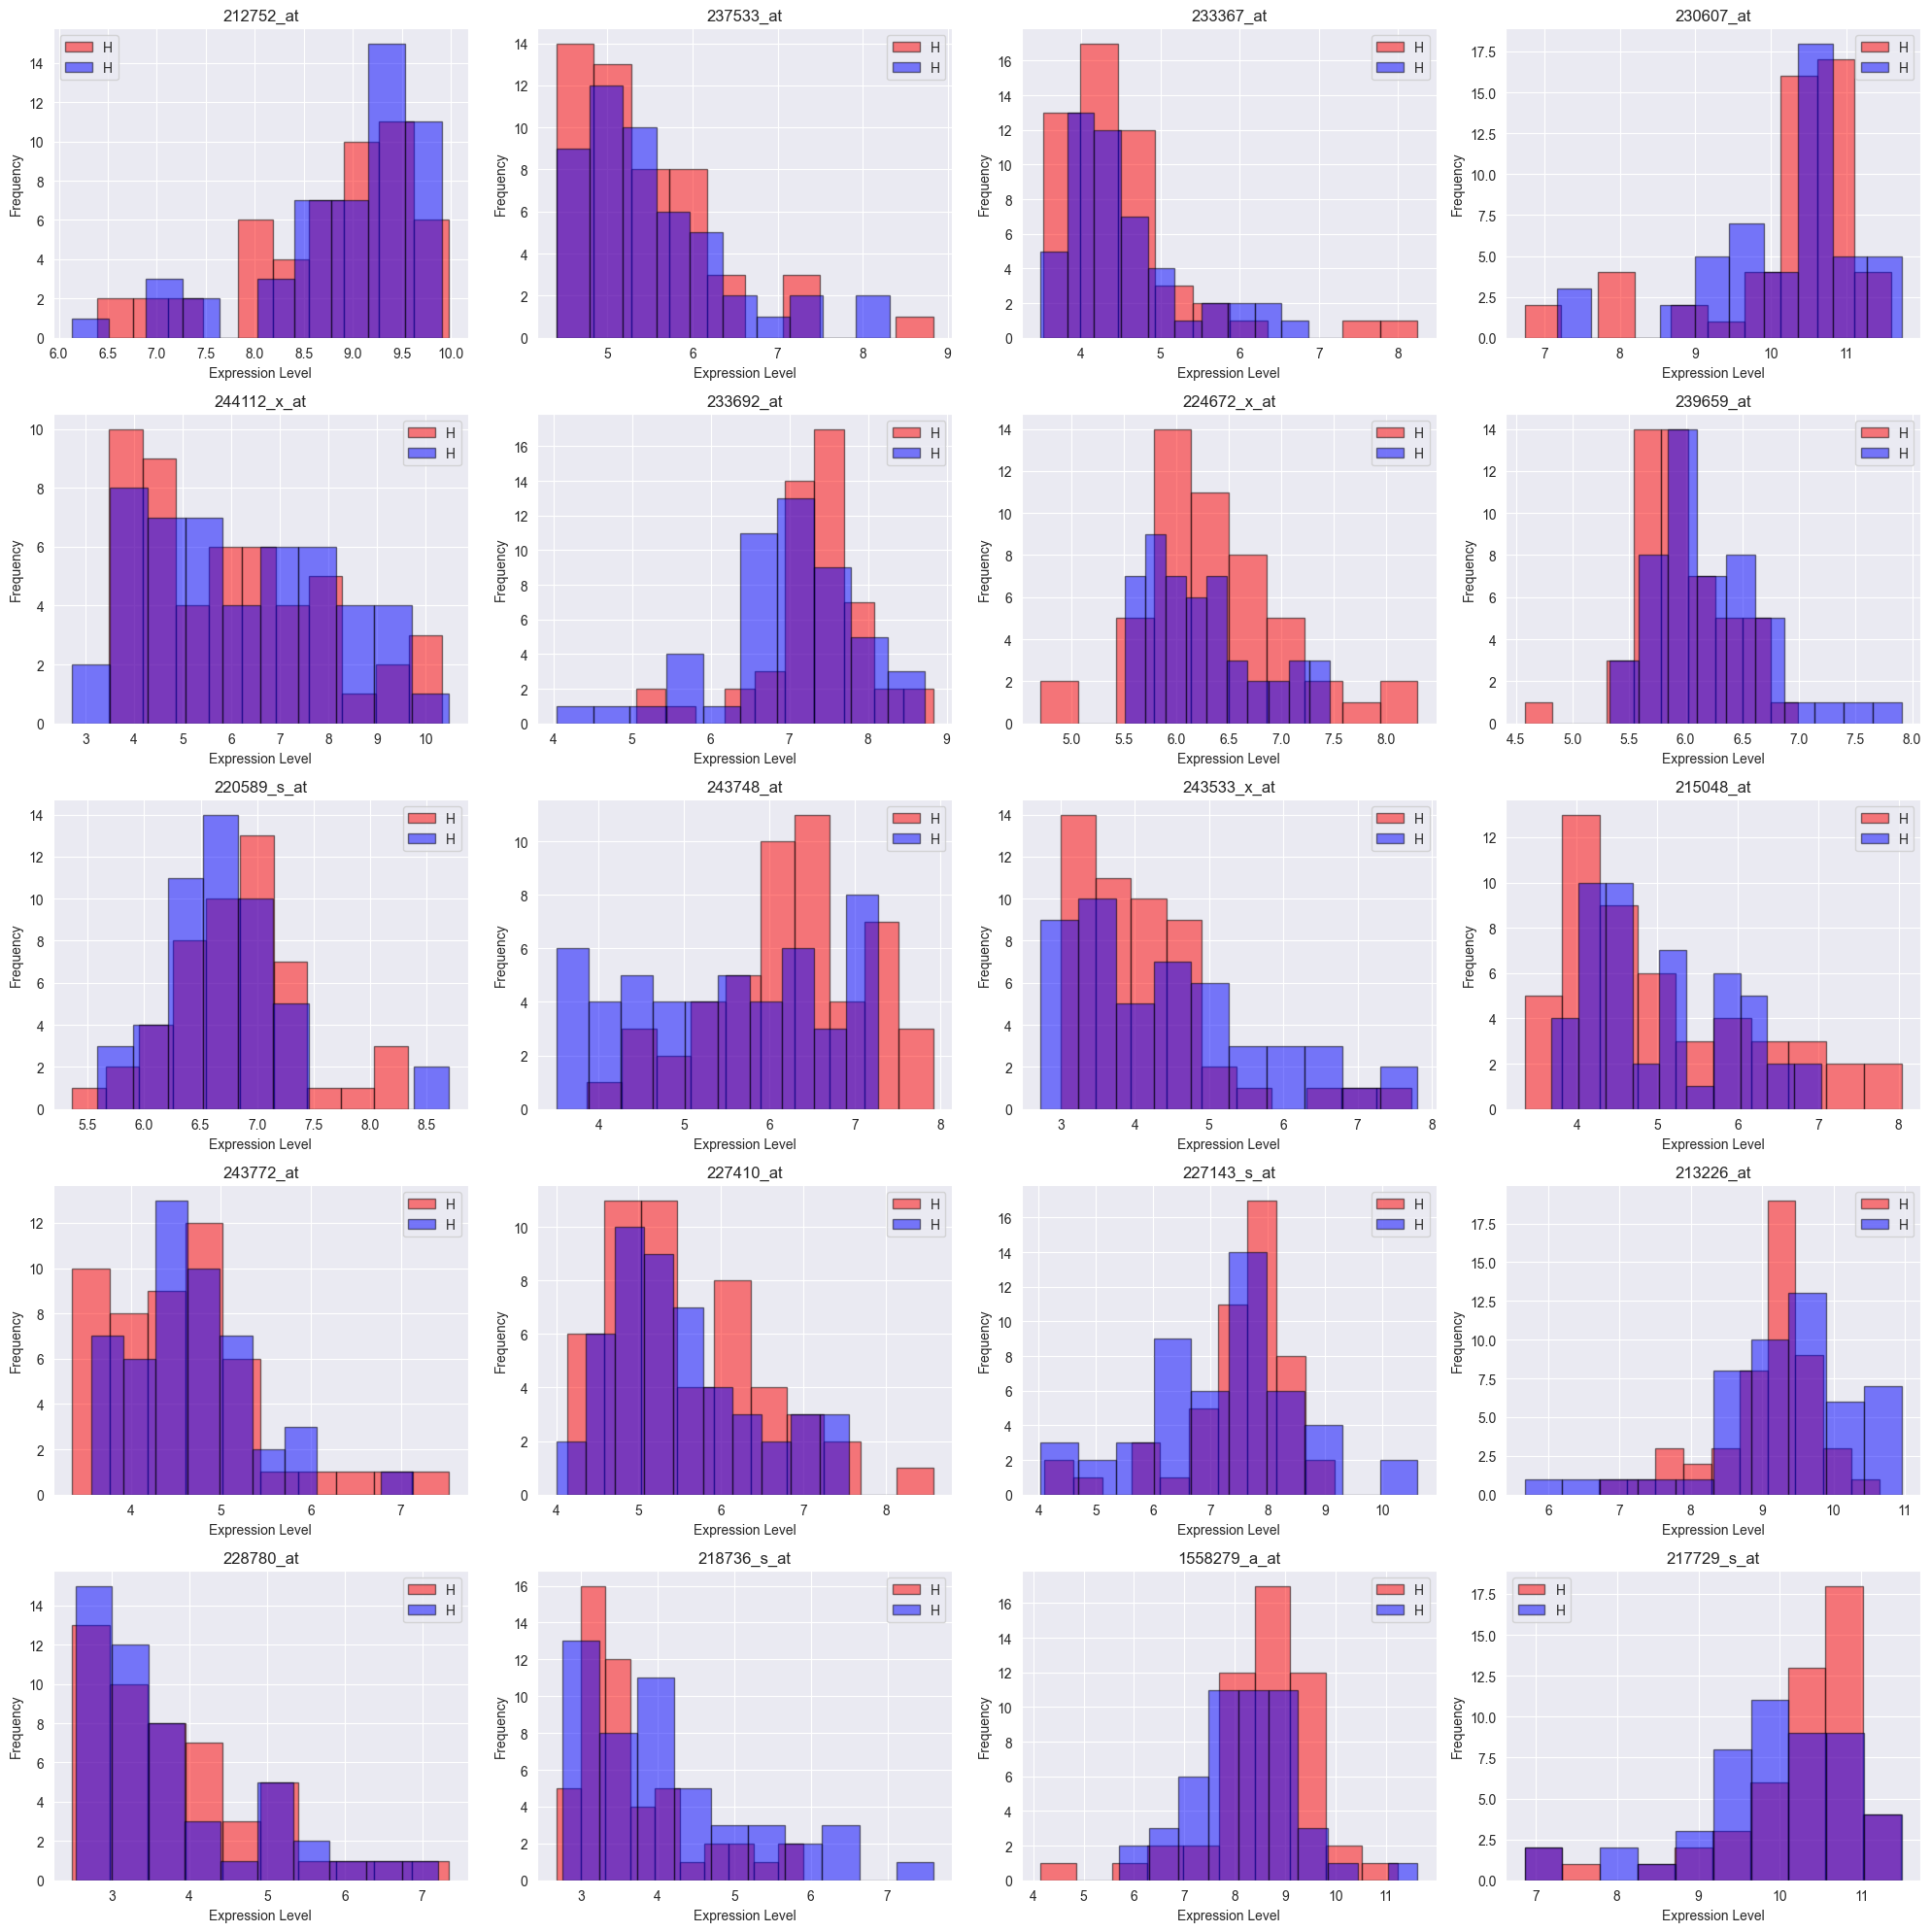

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

for i in range(20):
    column_name = data_for_hist_20_M.columns[i]

    plt.subplot(5, 4, i + 1)
    # Plot the histogram
    plt.hist(data_for_hist_20_H[column_name], alpha=0.5, label='H', bins=10, color='red', edgecolor='black')
    plt.hist(data_for_hist_20_M[column_name], alpha=0.5, label='H', bins=10, color='blue', edgecolor='black')


    # Set title and labels
    plt.title(column_name)
    plt.xlabel('Expression Level')
    plt.ylabel('Frequency')

    # Add legend
    plt.legend()

plt.tight_layout()
plt.show()


b. WRS for differential expression (DE)
1) Consider some gene, g. Under the null model (which assumes that
for g there is no M vs H DE), what is the expected sum of ranks of
g’s expression levels measured for samples labeled M?


In [56]:
num_of_M = data[data['Class']=='M'].shape[0]
num_of_H = data[data['Class']=='H'].shape[0]
expected_rank_sum_M = (num_of_M * (num_of_M + num_of_H + 1)) / 2
print(f'the expected rank sum of M is {expected_rank_sum_M}')

the expected rank sum of M is 2450.0


2) Denote this sum of ranks by RS(g). What is the minimal value, m,
that RS(g) can take?


In [57]:
num_of_M

49

In [58]:
min_rank_sum = (num_of_M * (num_of_M + 1)) / 2

print(f"Minimal sum of ranks (m) for M: {min_rank_sum}")

Minimal sum of ranks (m) for M: 1225.0


3) Under the null model, what is the probability of RS(g) = m?
(provide a formula for this and explain it)


In [59]:
from math import comb
N = num_of_H+num_of_M
p_min_rank_sum = 1 / comb(N, num_of_M)
# the formula is the probability under uniform descrete distribution, the size of the set is choose(N,n_of_M) 
# since that is number of ways to select n_M ranks from N
# This occurs when all M samples have the lowest possible ranks (1, 2, ..., n_M) 

print(f"Probability of RS(g) = min_rank_sum ({min_rank_sum}) is {p_min_rank_sum:}")


Probability of RS(g) = min_rank_sum (1225.0) is 1.9823306042836678e-29


4) Under the null model, what is the probability of RS(g) = m+1? what
is the probability of RS(g) = m+2?
(provide formulas and explain them)


In [60]:
# Compute probability of RS(g) = m+1
# Since we can pick any of the n_M samples to increase its rank by 1, 
# there are exactly n_M ways to do this.
p_m1 = 1/ comb(N, num_of_M)

# Compute probability of RS(g) = m+2
# This can happen in two ways:
# 1. Increasing one rank by 2 (n_M ways)
# 2. Increasing two different ranks by 1 each (binomial coefficient C(n_M, 2) ways)
# The total probability is the sum of both cases.
p_m2 = 2 / comb(N, num_of_M)

print(f"P(RS(g) = m+1): {p_m1:}  # Probability of getting one rank unit higher than min")
print(f"P(RS(g) = m+2): {p_m2:}  # Probability of getting two rank units higher than min")

#????????????

P(RS(g) = m+1): 1.9823306042836678e-29  # Probability of getting one rank unit higher than min
P(RS(g) = m+2): 3.9646612085673355e-29  # Probability of getting two rank units higher than min


5) Draw a histogram of the values of RS(g) in the dataset. Here g
ranges over all genes in the data (after the clean-up)

In [70]:
data.head()

"!Series_title ""A Whole Blood Molecular Signature for the Identification of Acute Myocardial Infarction Without Relying Upon Myonecrosis (microarray)""",Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
Unnamed: 1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.2573,13.2662,14.5712,14.2766,4.50466,3.13933,2.74701,2.65155,3.41343,3.14061
Unnamed: 2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.5939,13.517,14.7388,14.3412,4.40923,3.03996,2.63861,2.64362,3.39906,3.13269
Unnamed: 3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.3728,13.4166,14.6272,14.3186,4.31008,3.22011,2.49526,2.62603,3.53997,3.6984
Unnamed: 4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.4902,13.4948,14.7541,14.3633,4.43931,3.26378,2.5442,2.50496,3.39623,3.63861
Unnamed: 5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.2368,13.3302,14.5484,14.2637,4.56288,3.13852,2.50663,2.60971,3.43472,3.57765


(array([1.000e+00, 1.000e+00, 2.000e+00, 6.000e+00, 3.000e+00, 6.000e+00,
        2.100e+01, 2.000e+01, 3.300e+01, 4.200e+01, 5.300e+01, 6.300e+01,
        1.030e+02, 1.100e+02, 1.230e+02, 1.530e+02, 1.870e+02, 2.120e+02,
        2.360e+02, 2.820e+02, 3.630e+02, 4.030e+02, 4.240e+02, 4.530e+02,
        5.870e+02, 5.660e+02, 6.390e+02, 6.670e+02, 7.540e+02, 7.720e+02,
        7.760e+02, 8.390e+02, 9.340e+02, 9.990e+02, 9.960e+02, 1.055e+03,
        1.107e+03, 1.134e+03, 1.243e+03, 1.324e+03, 1.327e+03, 1.530e+03,
        1.573e+03, 1.580e+03, 1.738e+03, 1.723e+03, 1.866e+03, 1.970e+03,
        1.942e+03, 1.908e+03, 1.943e+03, 1.947e+03, 1.751e+03, 1.724e+03,
        1.485e+03, 1.482e+03, 1.264e+03, 1.148e+03, 9.940e+02, 7.960e+02,
        7.240e+02, 6.040e+02, 4.970e+02, 4.100e+02, 3.810e+02, 3.100e+02,
        2.850e+02, 2.120e+02, 2.140e+02, 1.620e+02, 1.730e+02, 1.380e+02,
        1.160e+02, 1.040e+02, 1.020e+02, 9.100e+01, 7.700e+01, 7.000e+01,
        7.300e+01, 6.000e+01, 5.400e+0

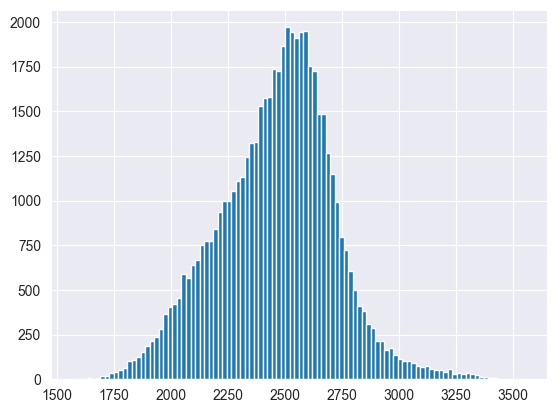

In [72]:
ranks = []
M_indices = data['Class'] == 'M'
for gene in data.iloc[:,2:].columns:
    gene_data = data[gene]
    gene_rank = gene_data.rank()
    M_rank = sum(gene_rank[M_indices])
    ranks.append(M_rank)

plt.hist(ranks, 100)




c. Differential Expression
The purpose is to determine the statistical significance of
differential expression (DE) observed for each gene in H vs M.
Evaluate the DE in both one-sided directions for every gene,
using both Student t-test and WRS test. Report the number of genes overexpressed in M vs H at a p-value
better (≤) than 0.05 and separately genes underexpressed in M
vs H at a p-value of 0.05. For both directions use both a Student t-
test and a WRS test.

In [74]:
data_M = data[data['Class'] == 'M'].iloc[:,2:]
data_H = data[data['Class'] == 'H'].iloc[:,2:]


In [75]:
from scipy import stats

gene_pvals = {'gene': [], 'p_val_t_test_m_greater_h': [],'p_val_t_test_h_greater_m': [], 'p_value_wrs_M_g_H':[], 'p_value_wrs_H_g_M':[]}
for gene in data_H.columns:
    M_values = pd.to_numeric(data_M.loc[:,gene])
    H_values = pd.to_numeric(data_H.loc[:,gene])
    
    _, p_value_ttest_M_g_H = stats.ttest_ind(M_values, H_values, alternative='greater')  # one-sided t-test (M > H)
    _, p_value_ttest_H_g_M = stats.ttest_ind(M_values, H_values, alternative='less')  # one-sided t-test (M < H)
    _, p_value_wrs_M_g_H = stats.ranksums(M_values, H_values,alternative='greater') # one-sided wrs (M > H)
    _, p_value_wrs_H_g_M = stats.ranksums(M_values, H_values,alternative='less') # one-sided wrs (M < H)

    gene_pvals['gene'].append(gene)
    gene_pvals['p_val_t_test_m_greater_h'].append(p_value_ttest_M_g_H)
    gene_pvals['p_val_t_test_h_greater_m'].append(p_value_ttest_H_g_M)
    gene_pvals['p_value_wrs_M_g_H'].append(p_value_wrs_M_g_H)
    gene_pvals['p_value_wrs_H_g_M'].append(p_value_wrs_H_g_M)
    

In [76]:
gene_pvals_table = pd.DataFrame(gene_pvals)

genes_underexpressed_t_test = sum(gene_pvals_table['p_val_t_test_h_greater_m'] <= 0.05)
genes_overexpressed_t_test = sum(gene_pvals_table['p_val_t_test_m_greater_h'] <= 0.05)

genes_underexpressed_WRS = sum(gene_pvals_table['p_value_wrs_H_g_M'] <= 0.05)
genes_overexpressed_WRS = sum(gene_pvals_table['p_value_wrs_M_g_H'] <= 0.05)

gene_pvals_table.head()

,gene,p_val_t_test_m_greater_h,p_val_t_test_h_greater_m,p_value_wrs_M_g_H,p_value_wrs_H_g_M
0,1007_s_at,0.897953,0.102047,0.846559,0.153441
1,1053_at,0.327719,0.672281,0.140567,0.859433
2,117_at,0.000053,0.999947,0.000009,0.999991
3,121_at,0.459246,0.540754,0.264390,0.735610
4,1255_g_at,0.315798,0.684202,0.150151,0.849849


In [77]:
print(f"Number of Under Expressed Genes by T-test: {genes_underexpressed_t_test}")
print(f"Number of Over expressed Genes by T-test: {genes_overexpressed_t_test}")

print(f"Number of Under Expressed Genes by WRS: {genes_underexpressed_WRS}")
print(f"Number of Over Expressed Genes by WRS: {genes_overexpressed_WRS}")

Number of Under Expressed Genes by T-test: 7467
Number of Over expressed Genes by T-test: 7067
Number of Under Expressed Genes by WRS: 9476
Number of Over Expressed Genes by WRS: 9019


d. Correlations
Select the 60 most significant genes from each one of the one-
sided WRS DE lists you computed in 3c. Generate a set of 120
genes, D, which is the union of the above two sets.
1) Compute Spearman rho correlations in all pairs within D (120
choose 2 numbers). Represent the correlation matrix as a 120x120
heatmap.


In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

genes_underexpressed_top_60 = gene_pvals_table.sort_values('p_value_wrs_H_g_M',ascending=True).iloc[:60,0]
genes_overexpressed_top_60 = gene_pvals_table.sort_values('p_value_wrs_M_g_H', ascending=True).iloc[:60,0]
D = pd.concat([genes_underexpressed_top_60, genes_overexpressed_top_60], ignore_index=True)

In [206]:
type(genes_underexpressed_top_60)

pandas.core.series.Series

In [205]:
gene_pvals_table.sort_values('p_value_wrs_M_g_H', ascending=True)

,gene,p_val_t_test_m_greater_h,p_val_t_test_h_greater_m,p_value_wrs_M_g_H,p_value_wrs_H_g_M
18255,208869_s_at,5.660254e-19,1.000000e+00,7.276809e-15,1.000000e+00
25504,216248_s_at,3.474918e-20,1.000000e+00,9.053458e-15,1.000000e+00
14046,204622_x_at,2.979881e-18,1.000000e+00,1.002448e-13,1.000000e+00
53257,244054_at,3.832922e-17,1.000000e+00,2.423984e-13,1.000000e+00
13312,203887_s_at,1.965370e-15,1.000000e+00,2.686869e-13,1.000000e+00
...,...,...,...,...,...
28050,218805_at,9.999675e-01,3.253754e-05,1.000000e+00,4.968344e-09
52660,243458_at,9.999999e-01,6.033325e-08,1.000000e+00,4.039573e-09
16398,206978_at,1.000000e+00,1.202913e-09,1.000000e+00,2.248666e-09
43298,234095_at,1.000000e+00,4.791695e-10,1.000000e+00,1.820032e-09


In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Generate the Spearman correlation matrix
D_gene_values = data.loc[:, D].astype(float)
spearman_corr_matrix, _ = spearmanr(D_gene_values, axis=0)
spearman_corr_matrix.shape

(120, 120)

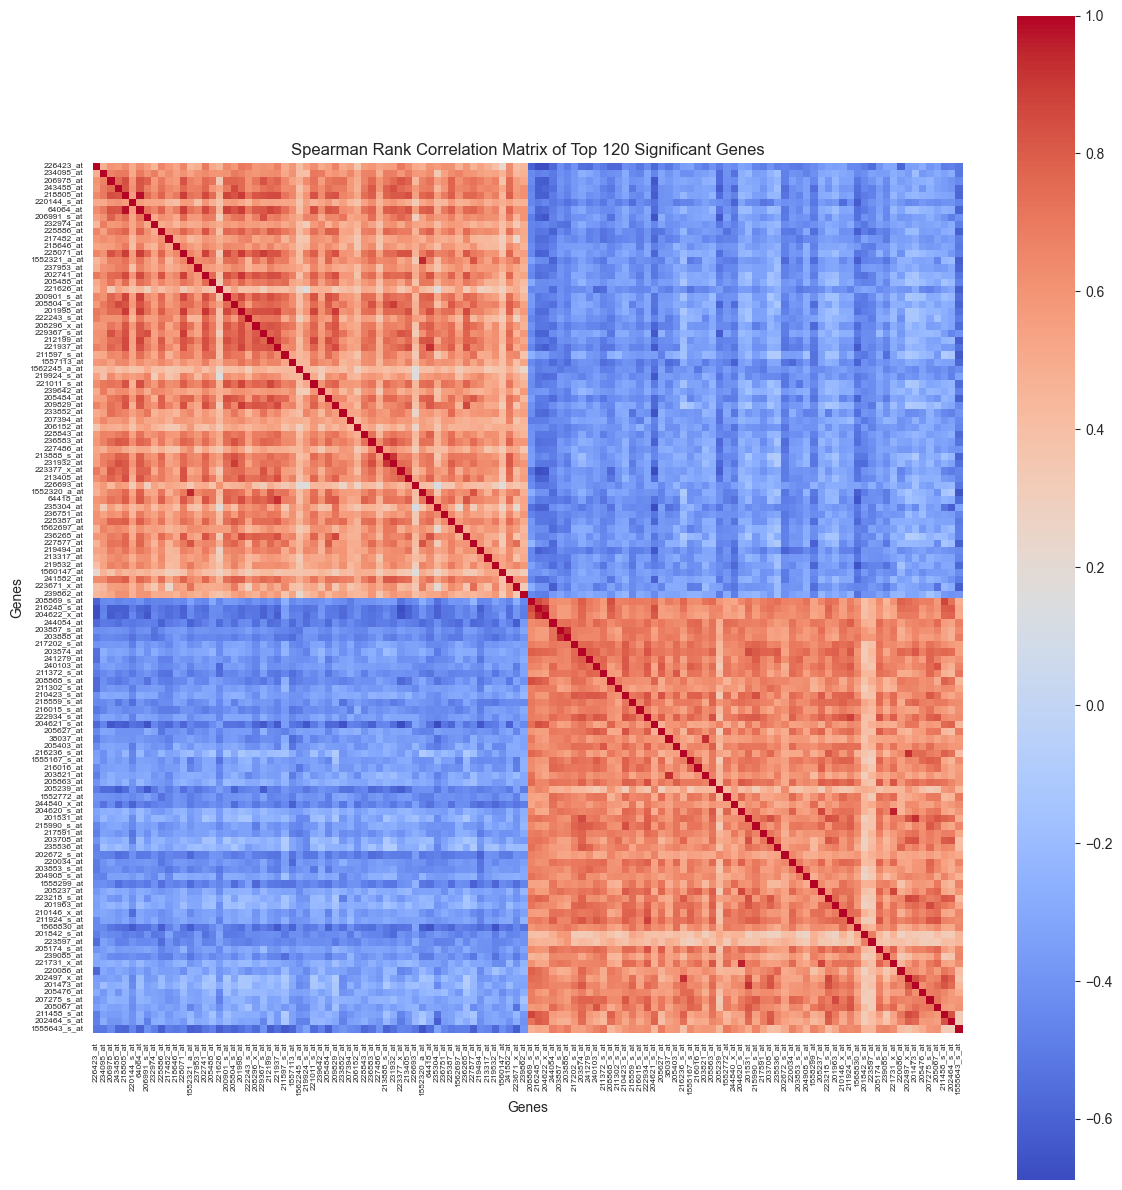

In [215]:

# Create the heatmap
plt.figure(figsize=(12, 12))  # You can adjust the size for better readability
sns.heatmap(spearman_corr_matrix, annot=False, cmap='coolwarm', cbar=True, square=True,
            xticklabels=D_gene_values.columns, yticklabels=D_gene_values.columns)

# Title and labels
plt.title("Spearman Rank Correlation Matrix of Top 120 Significant Genes")
plt.xlabel("Genes")
plt.ylabel("Genes")

# Adjust tick size and rotation
plt.xticks(rotation=90, fontsize=6)
plt.yticks(rotation=0, fontsize=6)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


2) What can you report about co-expression of genes in D (co-
expression is inferred from the correlation of the expression
levels of genes, across a set of samples)? Do we observe
any significant co-expression? If so how many pairs, etc.


In [115]:
threshold = 0.7

significant_mask = np.abs(spearman_corr_matrix) > threshold

upper_triangle_mask = np.triu(significant_mask, k=1)

num_significant_correlations = upper_triangle_mask.sum()

print(f"Number of significant correlations: {num_significant_correlations} out of {round((120**2)/2)} possible pairs")
print("")

Number of significant correlations: 1999 out of 7200 possible pairs



3) What would have been advantages and disadvantages of
computing co-expression for all genes in the study rather
than only for genes in D?


Computing co-expression for all genes provides a more comprehensive view of gene interactions and could uncover new biological insights.
By focusing only in D we might miss some interesting interactions.
However, it is computationally expensive, introduces more noise, and mainly requires stringent multiple-testing corrections, as when we increase the number of tests, we might get false positive results by chance.
By contrast, restricting analysis to genes in D (the top 120 significant DE genes) ensures focused, interpretable, and computationally efficient results and decrease the probability for false positive results.

4) Provide example datapoints matching the following
descriptions. Each example should be constructed over
n=50 datapoints. Provide a table
description of the example data as well as
a jointplot (see figure).
a) Data with
Pearson(x,y) > Spearman(x,y) + 1.2
b) Data with negative Kendall(x,y) and
positive Spearman(x,y) (or vice
versa)


In [134]:
from scipy.stats import pearsonr
pearson_corr_matrix = np.corrcoef(D_gene_values, rowvar=False)
pearson_corr_matrix.shape

(120, 120)

In [155]:
plus_1_p_2_spearman = spearman_corr_matrix+1.2
differntiation_matrix = pearson_corr_matrix-plus_1_p_2_spearman

In [156]:
datapoints = np.argwhere(differntiation_matrix > 0)

In [168]:
D_gene_values.iloc[:,0]

Unnamed: 1      8.070220
Unnamed: 2      7.779279
Unnamed: 3      8.901285
Unnamed: 4      7.808380
Unnamed: 5      8.170853
                 ...    
Unnamed: 95     8.991492
Unnamed: 96     9.137146
Unnamed: 97    10.691460
Unnamed: 98     8.786613
Unnamed: 99     9.090534
Name: 208869_s_at, Length: 99, dtype: float64

In [0]:
from scipy.stats import kendalltau

n = D_gene_values.shape[1]
kendall_corr_matrix = np.zeros((n, n))

# Compute the pairwise Kendall correlation coefficients
for i in range(n):
    for j in range(i, n):# Only need to compute the upper triangular part of the matrix
        corr, _ = kendalltau(D_gene_values.iloc[:, i], D_gene_values.iloc[:, j])
        kendall_corr_matrix[i, j] = corr
        kendall_corr_matrix[j, i] = corr

In [173]:
multipication_mat = kendall_corr_matrix*spearman_corr_matrix
ans = np.argwhere(multipication_mat < 0)

In [174]:
ans

array([], shape=(0, 2), dtype=int64)

5) Can you find 2 pairs of genes that fulfill the
conditions in section 4.a and 4.b?

e. Plots and Conclusions of the DE and correlation analysis
1) Construct the DE overabundance plots (blue and green
lines as shown in class) for M vs H overexpression (higher
expression levels in M) using WRS and t-test using the
results you had computed in Section 3c.
State, for each comparison, the number of genes, k, at
which we observe:
a) FDR = 0.1
b) FDR = 0.05
c) FDR = 0.001
If these events are not observed at any k, then make that
statement.


2) What can you say about the difference in results obtained
in WRS vs those obtained by Student t-test?


3) Select any 3 differentially expressed genes, from D (which
was defined in 3d), and produce a graphical representation
of their expression patterns that demonstrates the observed
DE.


4) Heatmap
Draw a heatmap representation of the expression values of
the genes in D (from 3d), across the entire cohort (all
samples). Order the genes and the samples to produce the
maximal visual effect.


In [176]:
data

"!Series_title ""A Whole Blood Molecular Signature for the Identification of Acute Myocardial Infarction Without Relying Upon Myonecrosis (microarray)""",Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
Unnamed: 1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.2573,13.2662,14.5712,14.2766,4.50466,3.13933,2.74701,2.65155,3.41343,3.14061
Unnamed: 2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.5939,13.517,14.7388,14.3412,4.40923,3.03996,2.63861,2.64362,3.39906,3.13269
Unnamed: 3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.3728,13.4166,14.6272,14.3186,4.31008,3.22011,2.49526,2.62603,3.53997,3.6984
Unnamed: 4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.4902,13.4948,14.7541,14.3633,4.43931,3.26378,2.5442,2.50496,3.39623,3.63861
Unnamed: 5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.2368,13.3302,14.5484,14.2637,4.56288,3.13852,2.50663,2.60971,3.43472,3.57765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 95,M,GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,...,6.60175,5.94231,7.29051,8.98851,5.56795,5.55878,5.42944,4.48794,4.25429,5.37581
Unnamed: 96,M,GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,...,14.271,14.1637,14.8845,14.7925,4.9022,3.417,2.83474,2.78236,3.88208,3.74414
Unnamed: 97,M,GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,...,13.8986,13.6824,14.8845,14.7838,5.23991,3.69918,3.24968,3.05673,3.64983,4.02154
Unnamed: 98,M,GSM1620916,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,...,13.847,13.5516,14.8581,14.7782,4.55613,3.48528,2.71141,2.83382,3.52341,3.81256


f. ML classifiers
1) Split the dataset into a 80/20 train/test random split.


In [178]:
from sklearn.model_selection import train_test_split

# Assuming your dataset is stored in a DataFrame called 'data'
# Split into features (X) and target (y), for example:
X = data.iloc[:,2:]  # Feature(s)
y = data['Class']    # Target

In [180]:
y

Unnamed: 1     H
Unnamed: 2     H
Unnamed: 3     H
Unnamed: 4     H
Unnamed: 5     H
              ..
Unnamed: 95    M
Unnamed: 96    M
Unnamed: 97    M
Unnamed: 98    M
Unnamed: 99    M
Name: Class, Length: 99, dtype: object

In [181]:

# Perform 80/20 random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2) Select the 6 most significant DE genes from the training
set according to WRS – best 3 overexpressed and best 3
underexpressed genes.


In [186]:
genes_underexpressed_top_3 = genes_underexpressed_top_60.iloc[:3]
genes_overexpressed_top_3 = genes_overexpressed_top_60.iloc[:3]


3) Perform Naïve Bayes classification to predict the classes
M and H and report your results. Use the sklearn library.


In [210]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = GaussianNB()  # For continuous features, use Gaussian Naïve Bayes
nb_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Step 6: Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.70
Confusion Matrix:
[[8 3]
 [3 6]]
Classification Report:
              precision    recall  f1-score   support

           H       0.73      0.73      0.73        11
           M       0.67      0.67      0.67         9

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



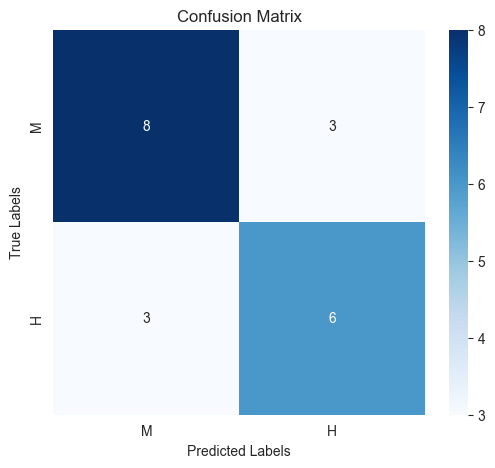

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Create a heatmap with seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['M', 'H'], yticklabels=['M', 'H'])

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

4) Build a Decision Tree to predict the the classes M and H
and report your results. Use the sklearn library. What
would you expect to get had you used all 50K features?


5) Compare the results of the two classifiers.

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Step 6: Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.80
Confusion Matrix:
[[8 3]
 [1 8]]
Classification Report:
              precision    recall  f1-score   support

           H       0.89      0.73      0.80        11
           M       0.73      0.89      0.80         9

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



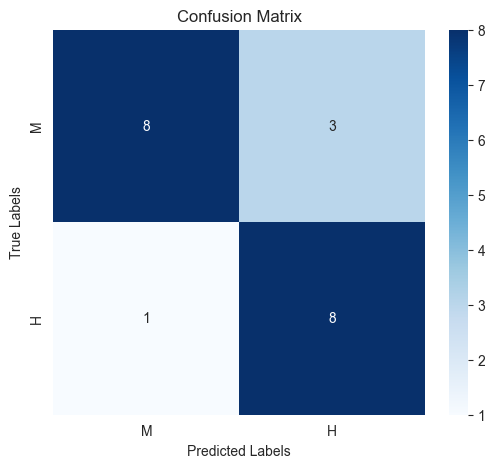

In [214]:
# Create a heatmap with seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['M', 'H'], yticklabels=['M', 'H'])

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()